In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Life Expectancy Prediction - WHO Dataset

# 📚 1. Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

import shap
shap.initjs()


In [3]:
# 📥 2. Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Life Expectancy Data.csv")
print("✅ Dataset loaded with shape:", df.shape)
df.head()


✅ Dataset loaded with shape: (2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# 🔍 3. Clean & Preprocess
# Drop rows with too many NaNs
df = df.dropna(thresh=df.shape[1]*0.7)

# Fill remaining with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Drop categorical vars for modeling
df.drop(columns=['Country'], inplace=True)

# Encode 'Status'
df['Status'] = df['Status'].map({'Developed': 1, 'Developing': 0})
df.dropna(inplace=True)


<ipython-input-4-241097b9b223>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(numeric_only=True), inplace=True)
<ipython-input-4-241097b9b223>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Country'], inplace=True)
<ipython-input-4-241097b9b223>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status'] = df['Status'].map({'Developed': 

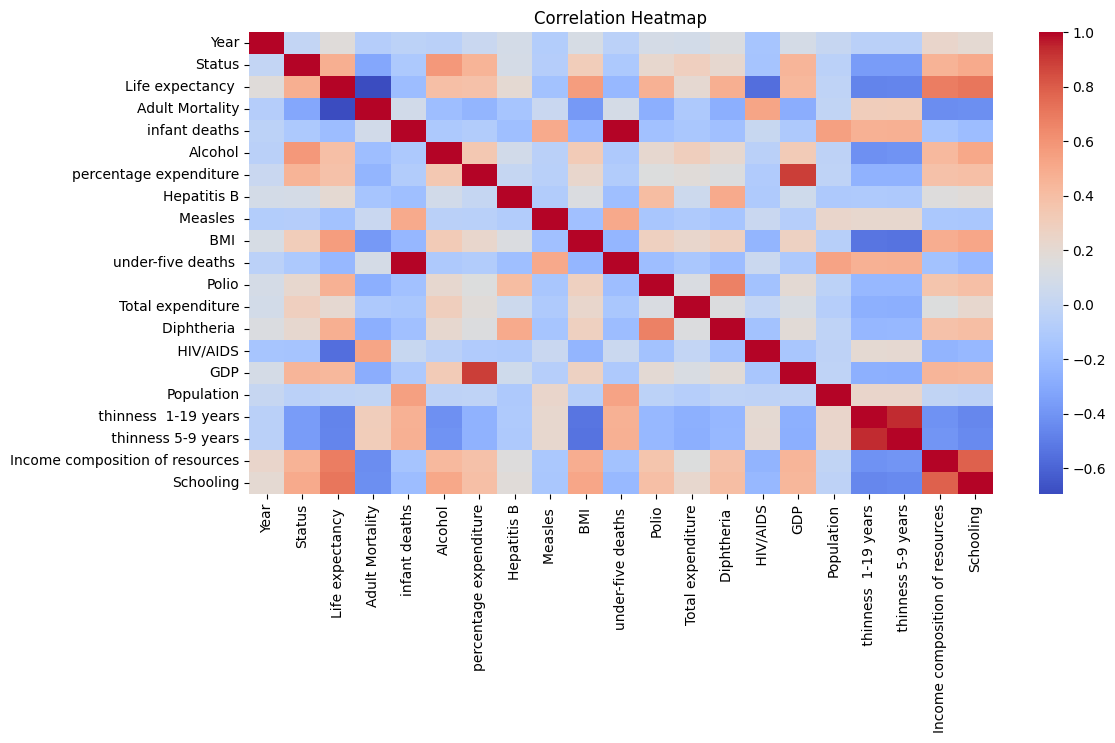

In [5]:
# 📊 4. Exploratory Data Analysis
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [6]:
# 🛠️ 5. Train-Test Split
X = df.drop(columns='Life expectancy ')
y = df['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# 🤖 6. Train Models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4)

models = {'Linear Regression': lr, 'Random Forest': rf, 'XGBoost': xgb}


In [8]:
# 🔍 7. Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print(f"📘 {name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")


📘 Linear Regression: RMSE = 4.08, R² = 0.82
📘 Random Forest: RMSE = 2.01, R² = 0.96
📘 XGBoost: RMSE = 2.15, R² = 0.95


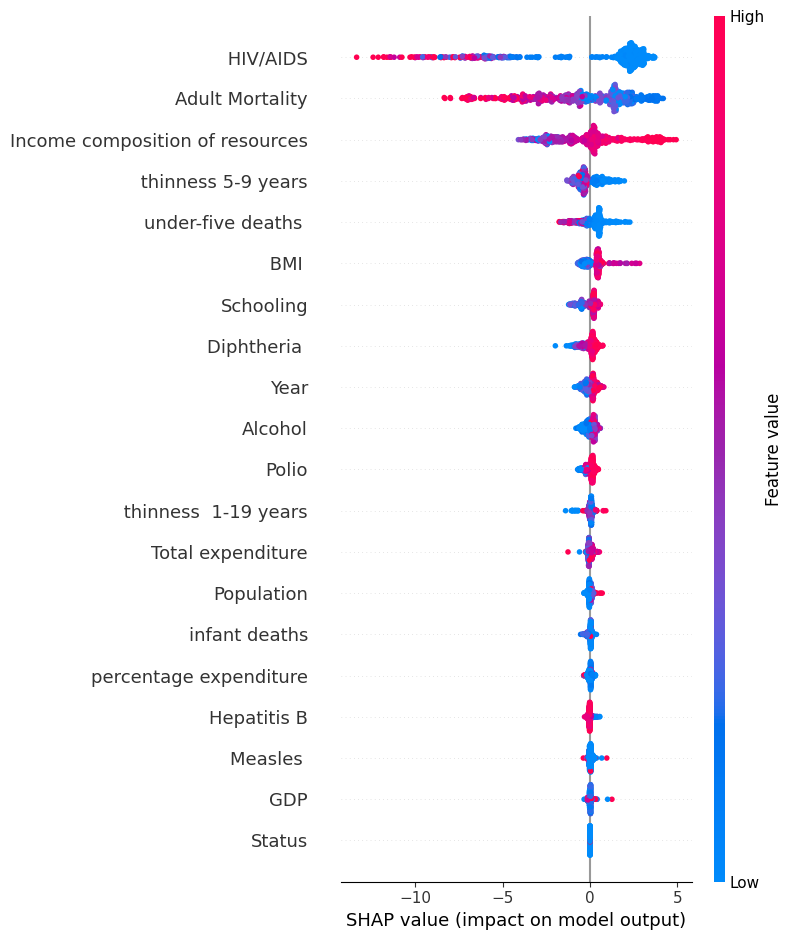

In [9]:
# 🧠 8. SHAP Explainability (for XGBoost)
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


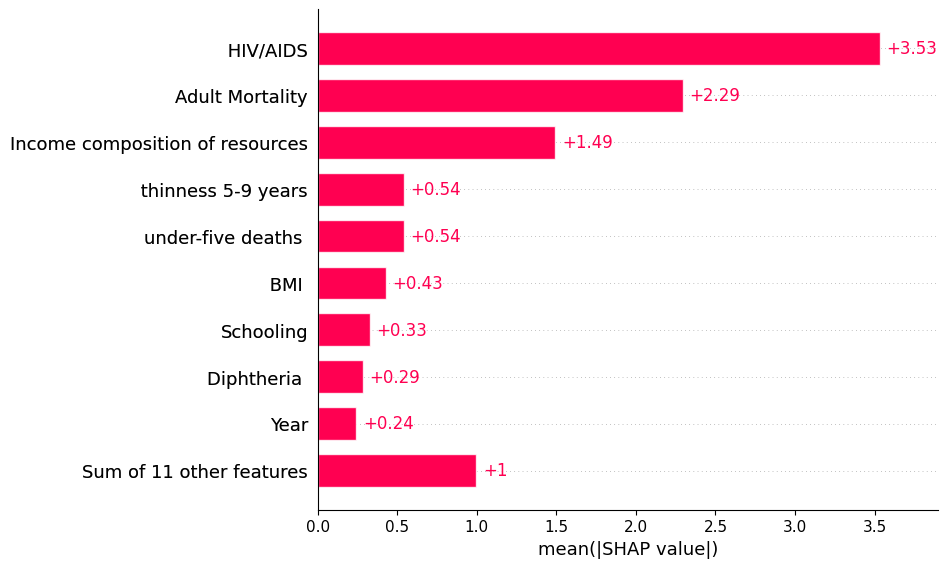

In [10]:
# 📌 9. Feature Importance from SHAP
shap.plots.bar(shap_values)


In [11]:
# ✅ 10. Save Best Model (Optional)
import joblib
joblib.dump(xgb, "life_expectancy_xgb_model.pkl")
print("🎉 Model saved as life_expectancy_xgb_model.pkl")


🎉 Model saved as life_expectancy_xgb_model.pkl
